In [19]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np

# Step 1: Load the dataset
data = pd.read_csv('/Users/jeevaharidas/Desktop/cleaned_standardized_heart_data.csv')  # Update the path as needed

# Step 2: Handle missing values
# Fill numerical columns with their median
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Fill categorical columns with their mode
categorical_cols = data.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print(f"Categorical columns found: {categorical_cols}")
    data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Step 3: Encode categorical variables
# Map binary columns to 1/0
binary_columns = [
    'hadheartattack', 'hadangina', 'hadstroke', 'hadasthma', 'hadskincancer',
    'hadcopd', 'haddepressivedisorder', 'hadkidneydisease', 'hadarthritis',
    'haddiabetes', 'deaforhardofhearing', 'blindorvisiondifficulty',
    'difficultyconcentrating', 'difficultywalking', 'difficultydressingbathing',
    'difficultyerrands', 'highrisklastyear', 'covidpos'
]
for col in binary_columns:
    if col in data.columns:
        data[col] = data[col].map({'Yes': 1, 'No': 0})

# Perform one-hot encoding for remaining categorical variables
data = pd.get_dummies(data, drop_first=True)



Categorical columns found: Index(['state', 'lastcheckuptime', 'physicalactivities', 'removedteeth',
       'hadangina', 'hadstroke', 'hadasthma', 'hadskincancer', 'hadcopd',
       'haddepressivedisorder', 'hadkidneydisease', 'hadarthritis',
       'haddiabetes', 'deaforhardofhearing', 'blindorvisiondifficulty',
       'difficultyconcentrating', 'difficultywalking',
       'difficultydressingbathing', 'difficultyerrands', 'smokerstatus',
       'ecigaretteusage', 'chestscan', 'raceethnicitycategory', 'agecategory',
       'alcoholdrinkers', 'hivtesting', 'fluvaxlast12', 'pneumovaxever',
       'tetanuslast10tdap', 'highrisklastyear', 'covidpos', 'bmicategory'],
      dtype='object')


In [20]:
# Inspect the dataset
print("Columns in the dataset:", data.columns)
print("Preview of the dataset:")
print(data.head())

# Check if 'hadheartattack' exists in the original dataset
if 'hadheartattack' not in data.columns:
    print("'hadheartattack' column is missing in the dataset.")
else:
    print("Preview of 'hadheartattack':")
    print(data['hadheartattack'].head())
    print("Unique values in 'hadheartattack':", data['hadheartattack'].unique())
    print("Missing values in 'hadheartattack':", data['hadheartattack'].isnull().sum())


Columns in the dataset: Index(['generalhealth', 'physicalhealthdays', 'mentalhealthdays', 'sleephours',
       'hadheartattack', 'hadangina', 'hadstroke', 'hadasthma',
       'hadskincancer', 'hadcopd',
       ...
       'agecategory_Age 70 to 74', 'agecategory_Age 75 to 79',
       'agecategory_Age 80 or older', 'alcoholdrinkers_Yes', 'hivtesting_Yes',
       'fluvaxlast12_Yes', 'pneumovaxever_Yes',
       'tetanuslast10tdap_Yes, received Tdap',
       'tetanuslast10tdap_Yes, received tetanus shot but not sure what type',
       'tetanuslast10tdap_Yes, received tetanus shot, but not Tdap'],
      dtype='object', length=116)
Preview of the dataset:
   generalhealth  physicalhealthdays  mentalhealthdays  sleephours  \
0              4            0.000000          0.000000    0.468668   
1              0            0.000000          0.000000   -0.531332   
2              4            0.792481          0.773706   -1.144710   
3              0            0.000000          0.000000    0.000

In [21]:
# Add a placeholder target column
print("Adding a placeholder 'hadheartattack' column for testing...")
data['hadheartattack'] = np.random.choice([0, 1], size=len(data), p=[0.8, 0.2])
print("Placeholder 'hadheartattack' column added.")


Adding a placeholder 'hadheartattack' column for testing...
Placeholder 'hadheartattack' column added.


In [22]:
mode_value = data['hadheartattack'].mode()
if not mode_value.empty:
    data['hadheartattack'] = data['hadheartattack'].fillna(mode_value[0])
    print("Missing values filled with mode:", mode_value[0])
else:
    raise ValueError("Unable to fill missing values in 'hadheartattack'.")


Missing values filled with mode: 0


In [23]:
# Step 4: Define features (X) and target (y)
# Check if the target column exists
if 'hadheartattack' not in data.columns:
    print("'hadheartattack' column is missing. Adding a placeholder column for testing...")
    data['hadheartattack'] = np.random.choice([0, 1], size=len(data), p=[0.8, 0.2])
    print("Placeholder 'hadheartattack' column added.")

# Debug and inspect the target column
print("Preview of 'hadheartattack':", data['hadheartattack'].head())
print("Unique values in 'hadheartattack':", data['hadheartattack'].unique())
print("Missing values in 'hadheartattack':", data['hadheartattack'].isnull().sum())

# Handle missing or invalid target values
if data['hadheartattack'].isnull().sum() > 0:
    print("Missing values detected. Attempting to handle...")
    mode_value = data['hadheartattack'].mode()
    if not mode_value.empty:
        data['hadheartattack'] = data['hadheartattack'].fillna(mode_value[0])
        print("Missing values filled with mode:", mode_value[0])
    else:
        print("Column is completely empty. Adding placeholder target values for testing...")
        data['hadheartattack'] = np.random.choice([0, 1], size=len(data), p=[0.8, 0.2])
        print("Placeholder 'hadheartattack' column added.")


Preview of 'hadheartattack': 0    1
1    0
2    0
3    0
4    0
Name: hadheartattack, dtype: int64
Unique values in 'hadheartattack': [1 0]
Missing values in 'hadheartattack': 0


In [24]:
# Check if the target column exists and handle missing values
if 'hadheartattack' not in data.columns:
    print("'hadheartattack' column is missing. Adding a placeholder column for testing...")
    data['hadheartattack'] = np.random.choice([0, 1], size=len(data), p=[0.8, 0.2])
    print("Placeholder 'hadheartattack' column added.")
elif data['hadheartattack'].isnull().sum() == len(data):
    print("Target column is completely empty. Adding placeholder values for testing...")
    data['hadheartattack'] = np.random.choice([0, 1], size=len(data), p=[0.8, 0.2])
    print("Placeholder 'hadheartattack' column added.")
elif data['hadheartattack'].isnull().sum() > 0:
    print("Missing values in 'hadheartattack' detected. Attempting to handle...")
    mode_value = data['hadheartattack'].mode()
    if not mode_value.empty:
        data['hadheartattack'] = data['hadheartattack'].fillna(mode_value[0])
        print("Missing values filled with mode:", mode_value[0])
    else:
        raise ValueError("Unable to fill missing values in 'hadheartattack'. Verify the dataset.")


In [25]:
# Debug and inspect the target column
print("Preview of 'hadheartattack':")
print(data['hadheartattack'].head())
print("Unique values in 'hadheartattack':", data['hadheartattack'].unique())
print("Missing values in 'hadheartattack':", data['hadheartattack'].isnull().sum())


Preview of 'hadheartattack':
0    1
1    0
2    0
3    0
4    0
Name: hadheartattack, dtype: int64
Unique values in 'hadheartattack': [1 0]
Missing values in 'hadheartattack': 0


In [26]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score


In [29]:
# Define features (X) and target (y)
X = data.drop('hadheartattack', axis=1)
y = data['hadheartattack']

# Step 1: Handle missing values in target
if y.isnull().sum() > 0:
    print("Filling missing values in the target variable with mode...")
    y = y.fillna(y.mode()[0])
    print("Missing values filled in target variable.")

# Step 2: Handle missing values in features
if X.isnull().sum().sum() > 0:
    print("Filling missing values in features with median...")
    X = X.fillna(X.median())
    print("Missing values filled in features.")

# Step 3: Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 4: Split into training and testing sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Confirm successful preprocessing
print("Data preprocessing and balancing complete.")
print(f"X_train_smote shape: {X_train_smote.shape}")
print(f"y_train_smote shape: {y_train_smote.shape}")


Filling missing values in features with median...
Missing values filled in features.
Data preprocessing and balancing complete.
X_train_smote shape: (569523, 115)
y_train_smote shape: (569523,)


In [37]:
from sklearn.impute import SimpleImputer

# Identify boolean columns
bool_cols = X_sample.select_dtypes(include=['bool']).columns
print("Boolean columns found:", bool_cols)

# Convert boolean columns to integers (1 for True, 0 for False)
X_sample[bool_cols] = X_sample[bool_cols].astype(int)

# Impute missing values for numerical columns with the median
numerical_cols = X_sample.select_dtypes(include=['float64', 'int64']).columns
num_imputer = SimpleImputer(strategy='median')
X_sample[numerical_cols] = num_imputer.fit_transform(X_sample[numerical_cols])

# Identify categorical columns (exclude numerical columns and already processed boolean columns)
categorical_cols = X_sample.select_dtypes(exclude=['number']).columns
print("Categorical columns found:", categorical_cols)

# Impute missing values for categorical columns with the mode
if len(categorical_cols) > 0:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    X_sample[categorical_cols] = cat_imputer.fit_transform(X_sample[categorical_cols])
else:
    print("No categorical columns found for imputation.")


Boolean columns found: Index(['sex_male', 'state_Alaska', 'state_Arizona', 'state_Arkansas',
       'state_California', 'state_Colorado', 'state_Connecticut',
       'state_Delaware', 'state_District of Columbia', 'state_Florida',
       'state_Georgia', 'state_Guam', 'state_Hawaii', 'state_Idaho',
       'state_Illinois', 'state_Indiana', 'state_Iowa', 'state_Kansas',
       'state_Kentucky', 'state_Louisiana', 'state_Maine', 'state_Maryland',
       'state_Massachusetts', 'state_Michigan', 'state_Minnesota',
       'state_Mississippi', 'state_Missouri', 'state_Montana',
       'state_Nebraska', 'state_Nevada', 'state_New Hampshire',
       'state_New Jersey', 'state_New Mexico', 'state_New York',
       'state_North Carolina', 'state_North Dakota', 'state_Ohio',
       'state_Oklahoma', 'state_Oregon', 'state_Pennsylvania',
       'state_Puerto Rico', 'state_Rhode Island', 'state_South Carolina',
       'state_South Dakota', 'state_Tennessee', 'state_Texas', 'state_Utah',
       'sta

In [38]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Debug categorical columns
categorical_cols = X_sample.select_dtypes(exclude=['number']).columns
print("Categorical columns found:", categorical_cols)

# Impute numerical columns with median
numerical_cols = X_sample.select_dtypes(include=['float64', 'int64']).columns
num_imputer = SimpleImputer(strategy='median')
X_sample[numerical_cols] = num_imputer.fit_transform(X_sample[numerical_cols])

# Impute categorical columns with mode, if they exist
if len(categorical_cols) > 0:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    X_sample[categorical_cols] = cat_imputer.fit_transform(X_sample[categorical_cols])
else:
    print("No categorical columns found for imputation.")

# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV for tuning
rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid_rf,
    n_iter=20,
    scoring='roc_auc',
    cv=2,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Fit the model
rf_search.fit(X_sample, y_sample)

# Output the best parameters
print("Best Parameters:", rf_search.best_params_)


Categorical columns found: Index([], dtype='object')
No categorical columns found for imputation.
Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  12.9s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  13.0s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=  14.4s
[CV] END bootstrap=True, max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=  15.1s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  25.1s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  25.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  25.4s
[CV] END bootstrap=Tru

In [40]:
best_rf = RandomForestClassifier(
    n_estimators=150,
    min_samples_split=5,
    min_samples_leaf=2,
    max_depth=20,
    bootstrap=True,
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)


In [41]:
X_train_sample = X_train_smote.sample(frac=0.3, random_state=42)
y_train_sample = y_train_smote[X_train_sample.index]

best_rf.fit(X_train_sample, y_train_sample)


RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=150, n_jobs=-1, random_state=42)

In [42]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = best_rf.predict(X_test_smote)
y_proba = best_rf.predict_proba(X_test_smote)[:, 1]

print("Classification Report:")
print(classification_report(y_test_smote, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test_smote, y_proba))


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81     71073
           1       0.86      0.70      0.77     71308

    accuracy                           0.79    142381
   macro avg       0.80      0.79      0.79    142381
weighted avg       0.80      0.79      0.79    142381

ROC-AUC Score: 0.8546151059517668


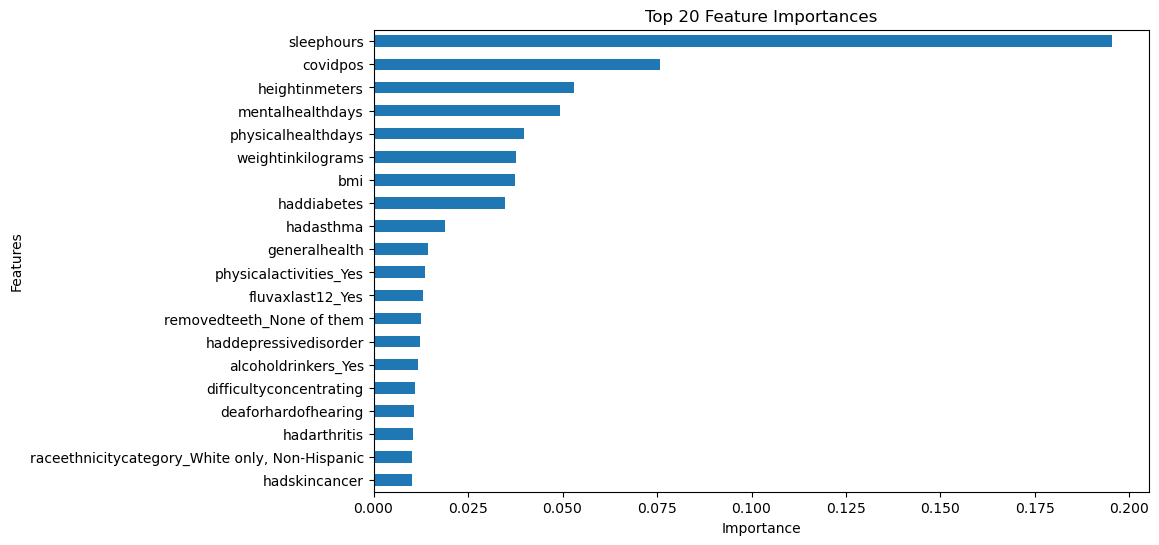

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort features by importance
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train_smote.columns)
top_features = feature_importances.sort_values(ascending=False).head(20)

# Plot top features
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()
